In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [3]:
# Dice similarity function
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true!=k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

In [4]:
images_folder = "image/"
file_img = os.listdir(images_folder)

In [5]:
similarity_score = []
for index, i in enumerate(file_img):
    y_true = cv2.imread(f'image/{i}') 
    y_pred = cv2.imread(f'predicted_img/{i}')

    y_true = cv2.cvtColor(y_true, cv2.COLOR_BGR2GRAY)
    y_pred = cv2.cvtColor(y_pred, cv2.COLOR_BGR2GRAY)

    y_true = cv2.resize(y_true, (224, 224))
    y_pred = cv2.resize(y_pred, (224, 224))
    
    dice_score = dice(y_pred, y_true, k=255)

    similarity_score.append(dice_score)

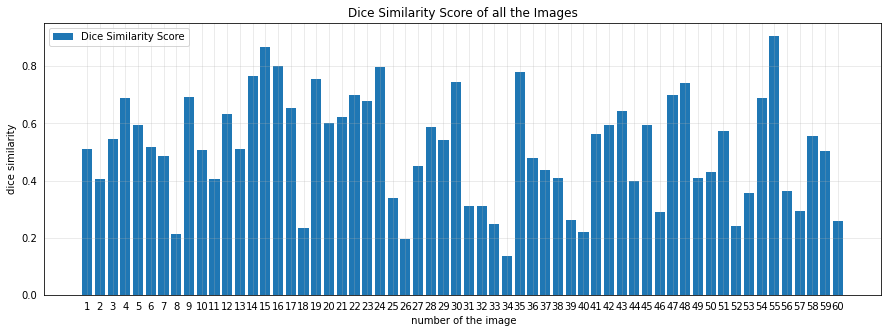

In [20]:
plt.figure(figsize=(15,5))
plt.bar([i for i in range (1, len(similarity_score)+1)], similarity_score)
plt.tick_params(bottom=False,left=False)
plt.title("Dice Similarity Score of all the Images")
plt.xlabel(" number of the image")
plt.ylabel("dice similarity")
plt.xticks(np.arange(1,len(similarity_score)+1, 1))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend(["Dice Similarity Score"])
plt.show()

In [15]:
print("Mean Dice Similarity Value for all 60-images: {}".format(np.mean(similarity_score)))

Mean Dice Similarity Value for all 60-images: 0.5123016570698135


In [16]:
print("Standard Deviation Dice Similarity Value for all 60-images: {}".format(np.std(similarity_score)))


Standard Deviation Dice Similarity Value for all 60-images: 0.18893575607832033
